# Test new tck spline implementation of code

The fluxtube stability code now uses the functional interface to scipy.interpolate splines instead of the object-oriented interface and precalculates the derivatives of splines in the equilibrium creation stage to boost performance.
This notebook tests running skin_core_scanner with the new splines.

In [39]:
from __future__ import print_function, unicode_literals, division
from __future__ import absolute_import
from future import standard_library, utils
from future.builtins import (ascii, bytes, chr, dict, filter, hex, input,
                             int, map, next, oct, open, pow, range, round,
                             str, super, zip)

In [40]:
import numpy as np
import sys
sys.path.append('..')
import skin_core_scanner_simple as scss
reload(scss)
import equil_solver as es
reload(es)
import newcomb_simple as new
reload(new)
import singularity_frobenius as frob
reload(frob)
import external_stability as ext
reload(ext)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

import lambda_k_plotting_simple as plot
reload(plot)

<module 'lambda_k_plotting_simple' from '../lambda_k_plotting_simple.pyc'>

In [41]:
ambda_a_mesh, k_a_mesh, stability_maps = scss.scan_lambda_k_space([0.01, 3.0, 10.], [0.01, 1.5, 10], epsilon=0.11,
                         core_radius_norm=0.9, transition_width_norm=0.033, skin_width_norm=0.034, method='lsoda', max_step=1E-2, nsteps=1000)

('lambda_bar:', 0.01)
('lambda_bar:', 0.34222222222222226)
('lambda_bar:', 0.67444444444444451)
('lambda_bar:', 1.0066666666666668)
('lambda_bar:', 1.338888888888889)
('lambda_bar:', 1.6711111111111112)
('lambda_bar:', 2.0033333333333334)
('lambda_bar:', 2.3355555555555556)
('lambda_bar:', 2.6677777777777778)
('lambda_bar:', 3.0)
Saved in Directory:2015-10-17-16-18


/home/jensv/anaconda/lib/python2.7/site-packages/scipy/integrate/_ode.py:1196: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  'Unexpected istate=%s' % istate))


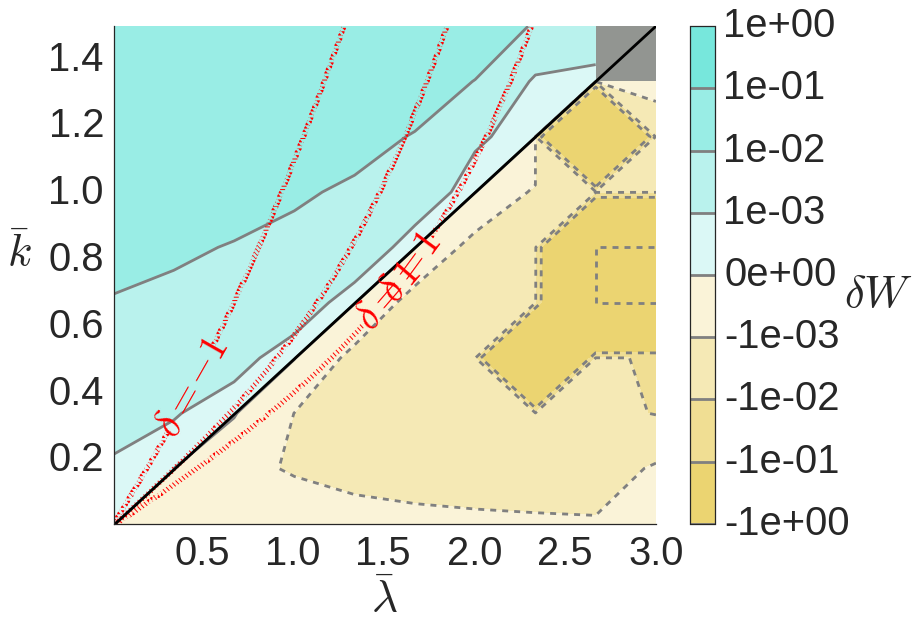

In [43]:
plot.plot_lambda_k_space_dw('../../output/2015-10-17-16-18/meshes.npz', 0.11, 'ep12-m1', 
                            mode_to_plot='m_neg_1', levels=[-1, -1e-1, -1e-2, -1e-3, 
                                                            0, 1e-3, 1e-2, 1e-1, 1], 
                            floor_norm=True, analytic_compare=True)